In [1]:
import tensorboard as tb
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from packaging import version
from scipy import stats
from scipy.interpolate import Rbf

In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.4.0


## Load data from experiment_id (Tensorbaord dev)

In [3]:
experiment_id = "jgZIqljwQoCQNyb2MM0D2w"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()

,run,tag,step,value
0,CartPole-v1/worker10_byzantine0_detect-attack/...,Byzantine/N_good_pred_0,21,9.0
1,CartPole-v1/worker10_byzantine0_detect-attack/...,Byzantine/N_good_pred_0,41,8.0
2,CartPole-v1/worker10_byzantine0_detect-attack/...,Byzantine/N_good_pred_0,59,10.0
3,CartPole-v1/worker10_byzantine0_detect-attack/...,Byzantine/N_good_pred_0,78,10.0
4,CartPole-v1/worker10_byzantine0_detect-attack/...,Byzantine/N_good_pred_0,97,9.0
...,...,...,...,...
154249,CartPole-v1/worker5_byzantine0_detect-attack/E...,validate/total_rewards_9,4947,500.0
154250,CartPole-v1/worker5_byzantine0_detect-attack/E...,validate/total_rewards_9,4965,500.0
154251,CartPole-v1/worker5_byzantine0_detect-attack/E...,validate/total_rewards_9,4981,500.0
154252,CartPole-v1/worker5_byzantine0_detect-attack/E...,validate/total_rewards_9,4997,500.0


In [4]:
print(df["run"].unique())
print(df["tag"].unique())

['CartPole-v1/worker10_byzantine0_detect-attack/Exp1_Cartpole_Ours_W10_WithFilter_20210118T002849'
 'CartPole-v1/worker1_byzantine0_detect-attack/Exp1_Cartpole_Ours_W1_20210118T002846'
 'CartPole-v1/worker1_byzantine0_detect-attack/Exp1_Cartpole_SVRG_W1_20210118T002847'
 'CartPole-v1/worker1_byzantine0_detect-attack/Exp1_Cartpole_VPG_W1_20210118T003012'
 'CartPole-v1/worker5_byzantine0_detect-attack/Exp1_Cartpole_Ours_W5_20210118T002848']
['Byzantine/N_good_pred_0' 'Byzantine/N_good_pred_1'
 'Byzantine/N_good_pred_2' 'Byzantine/N_good_pred_3'
 'Byzantine/N_good_pred_4' 'Byzantine/N_good_pred_5'
 'Byzantine/N_good_pred_6' 'Byzantine/N_good_pred_7'
 'Byzantine/N_good_pred_8' 'Byzantine/N_good_pred_9'
 'Byzantine/threshold_0' 'Byzantine/threshold_1' 'Byzantine/threshold_2'
 'Byzantine/threshold_3' 'Byzantine/threshold_4' 'Byzantine/threshold_5'
 'Byzantine/threshold_6' 'Byzantine/threshold_7' 'Byzantine/threshold_8'
 'Byzantine/threshold_9' 'grad/grad_0' 'grad/grad_1' 'grad/grad_2'
 'grad

In [5]:
dfw = experiment.get_scalars(pivot=False) 
dfw

,run,tag,step,value
0,CartPole-v1/worker10_byzantine0_detect-attack/...,Byzantine/N_good_pred_0,21,9.0
1,CartPole-v1/worker10_byzantine0_detect-attack/...,Byzantine/N_good_pred_0,41,8.0
2,CartPole-v1/worker10_byzantine0_detect-attack/...,Byzantine/N_good_pred_0,59,10.0
3,CartPole-v1/worker10_byzantine0_detect-attack/...,Byzantine/N_good_pred_0,78,10.0
4,CartPole-v1/worker10_byzantine0_detect-attack/...,Byzantine/N_good_pred_0,97,9.0
...,...,...,...,...
154249,CartPole-v1/worker5_byzantine0_detect-attack/E...,validate/total_rewards_9,4947,500.0
154250,CartPole-v1/worker5_byzantine0_detect-attack/E...,validate/total_rewards_9,4965,500.0
154251,CartPole-v1/worker5_byzantine0_detect-attack/E...,validate/total_rewards_9,4981,500.0
154252,CartPole-v1/worker5_byzantine0_detect-attack/E...,validate/total_rewards_9,4997,500.0


## Train or Validate?

In [6]:
# dfw = dfw[dfw.tag.str.startswith("train/total")]
dfw = dfw[dfw.tag.str.startswith("validate/total")]

## Plot configures

In [7]:
max_trajectories = int(5e3)
max_runs = 10
interval = 0.90

## Polt!

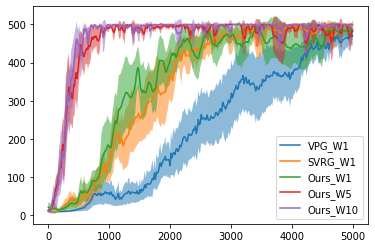

In [8]:
plt.figure()
ax = plt.subplot(111)

runs = data["run"].unique()
runs_ordered = []
alg_name = []
for i in range(5):
    for name in runs:
        if i == 0 and 'VPG' in name:
            runs_ordered.append(name)
            alg_name.append('GPOMDP(k=1)')
        elif i == 1 and 'SVRG' in name:
            runs_ordered.append(name)
            alg_name.append('SVRPG(k=1)')
        elif i == 2 and 'Ours' in name and 'W1_' in name:
            runs_ordered.append(name)
            alg_name.append('FedPG-BF(k=1)')
        elif i == 3 and 'Ours' in name and 'W5' in name:
            runs_ordered.append(name)
            alg_name.append('FedPG-BF(k=5)')
        elif i == 4 and 'Ours' in name and 'W10' in name:
            runs_ordered.append(name)
            alg_name.append('FedPG-BF(k=10)')

for id,run_name in enumerate(runs_ordered):
    cur_dfw = data[data.run.str.endswith(f'{run_name}')]
    lines = []
    for run_id in range(max_runs):
        steps = cur_dfw[cur_dfw.tag.str.endswith(f'{run_id}')]['step'].to_numpy()
        values = cur_dfw[cur_dfw.tag.str.endswith(f'{run_id}')]['value'].to_numpy()
        lines.append(Rbf(steps, values, function = 'linear')(np.arange(max_trajectories)))
    mean = np.mean(lines, axis=0)
    l, h = stats.norm.interval(interval, loc=np.mean(lines, axis = 0), scale=stats.sem(lines, axis = 0))
    ax.plot(mean, label=(f'{alg_name[id]}'))
    ax.fill_between(range(int(max_trajectories)), l, h, alpha = 0.5)


ax.legend() 
plt.ylim(0,4000)
plt.show()